This example presents the basics of `digdem` functions, on a synthetic example. let's first import the necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import digdem.surfmod
import digdem.section
import digdem.plot

We create the initial topography that will be modified. It consists of a simple inclined plane with slope angle 45°and curved shape. We then display it with buil-in functions.

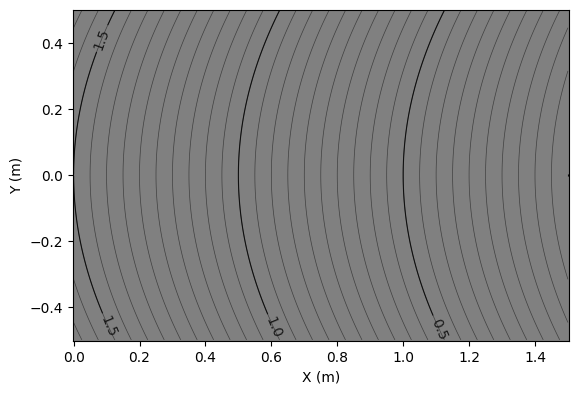

In [2]:
# Initiate mesh
x = np.linspace(0, 1.5, 300)
y = np.linspace(-0.5, 0.5, 200)
xmesh, ymesh = np.meshgrid(x, y, indexing='ij')

# Initial topography
slope_angle = 45
zold = -np.tan(np.deg2rad(slope_angle)) * xmesh + 0.5 * ymesh**2
zold = zold - np.min(zold)
#zlod = np.minimum

# Plot topography
digdem.plot.plot_topo(zold, x, y,
                      uniform_grey=0.5,
                      indexing='ij',
                     )

Create the mask where the topography will be modified. here we consider an ellipse.

In [3]:
# Mask where topography must be modified
xc = 0.6
yc = 0.0
xwidth = 0.30
ywidth = 0.20
tmp = 1 - (xmesh - xc) ** 2 / xwidth**2 - (ymesh - yc) ** 2 / ywidth**2
mask = tmp >= 0

We now create two longitudinal and transversal controlling sections. Their names are respectively "A-B" and "C-D". `digdem` interprets the name as the names of the extrimity points. 

In [4]:
# Longitudinal cross-section
point1 = (0.1, 0.0)
point2 = (1.2, 0.0)
sec_long = digdem.section.Section(
    [point1, point2], "A-B", normalized=False, dinterp=0.05
)

# Transversal cross-section
point1 = (0.6, -0.3)
point2 = (0.6, 0.3)
sec_trans = digdem.section.Section(
    [point1, point2], "C-D", normalized=False, dinterp=0.05
)

The `new_dem` instance is then created with all the previous data:

In [5]:
new_dem = digdem.surfmod.SurfMod(
    zold,
    mask,
    xaxis=x,
    yaxis=y,
    sections=[sec_long, sec_trans],
    dinterp=0.05,
    smooth=0,
    sparse_interp=1,
)

Set altitude of the intersection of the two sections as the only control point, and update to get the new topography

In [6]:
new_dem.set_intersections(["A-B"], ["C-D"], [0.8])

new_dem.update_interpolation()

Plot the new topography. You can specify the azimuthal and altitude angle of the light source (`azdeg` and `altdeg`), as well as `control_points_properties` given as kwargs to `plt.plot`function. `point_name_dist` controls the distance between the profiles extremities and their name, in map units. If `None`, a default value is set from the profile length. The appearence of the text is controlled by `text_properties` passed to `plt.test` function. The `axe` for plot display can be given as argument, otherwise a figure with size `figsize` is created.

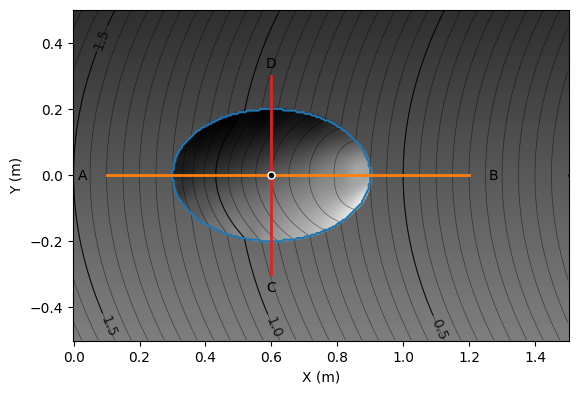

In [7]:
fig, axe = new_dem.plot(
        figsize=None,
        axe=None,
        azdeg=315,
        altdeg=45,
        section_properties={"lw": 2},
        text_properties={},
        control_points_properties=None,
        point_name_dist=None,
)
plt.show()

You can also plot the interpolated profiles. Control points along profiles are by default displayed in grey, and extremity points (between which sections are interpolated) in white. 

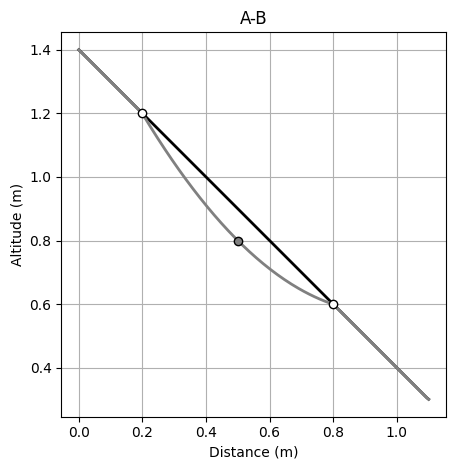

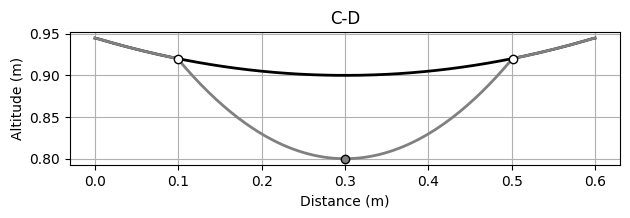

In [8]:
fig, axe = new_dem["A-B"].plot()
fig, axe = new_dem["C-D"].plot()

plt.show()

Change intersection height and re-interpolate.

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='X (m)', ylabel='Y (m)'>)

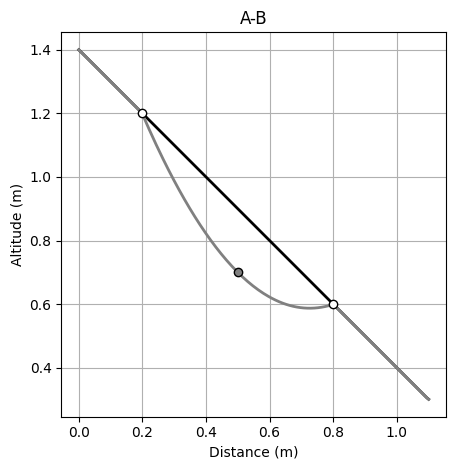

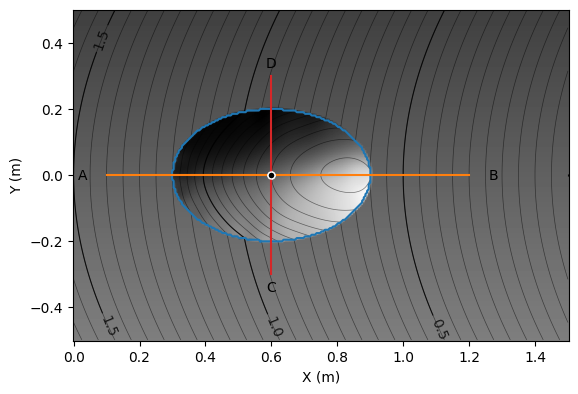

In [9]:
new_dem.set_intersections(["A-B"], ["C-D"], [0.7])
new_dem.update_interpolation()
new_dem["A-B"].plot()
new_dem.plot(control_points_properties=None)

Add new control points along the profiles, by specifying their distance from the origin and their height.

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'C-D'}, xlabel='Distance (m)', ylabel='Altitude (m)'>)

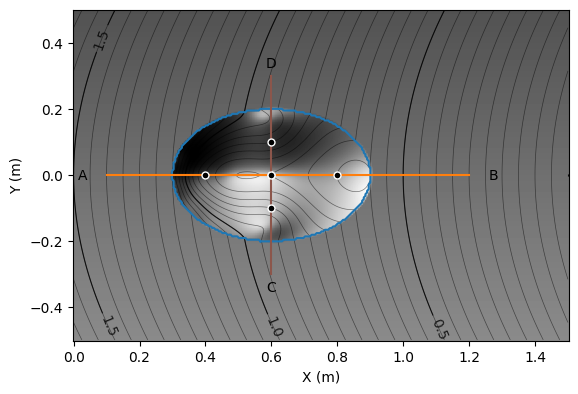

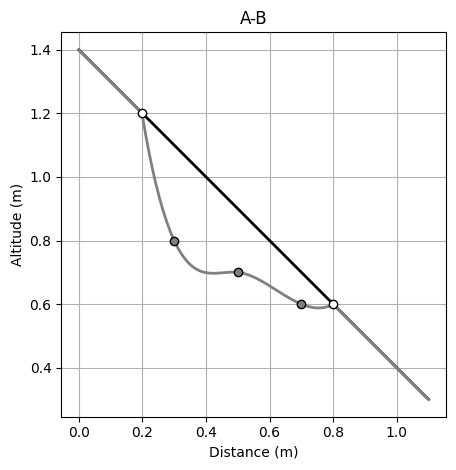

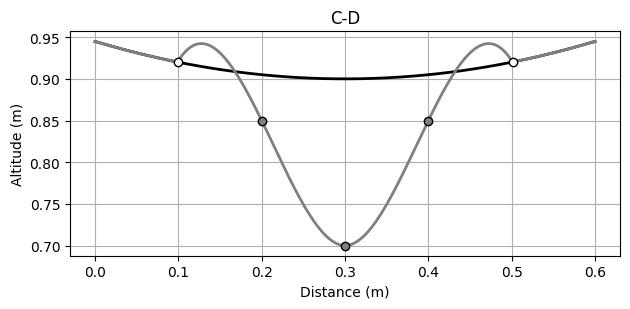

In [10]:
new_dem["A-B"].set_control_points([0.3, 0.7], [0.8, 0.6])
new_dem["C-D"].set_control_points([0.2, 0.4], [0.85, 0.85])
new_dem.update_interpolation()
new_dem.plot()
new_dem["A-B"].plot()
new_dem["C-D"].plot()

You can impose a maximum and minimum surfaces for the interpolated topography with the attributes `surf_max` and `surf_min` attributes of the `SurfMod` instance. However note that  these minimum and maximum surfaces will only be considered  when evaluating the final new surface, not sections. Thus plots of sections will display the unccorected interpolated topography. For instance:

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'C-D'}, xlabel='Distance (m)', ylabel='Altitude (m)'>)

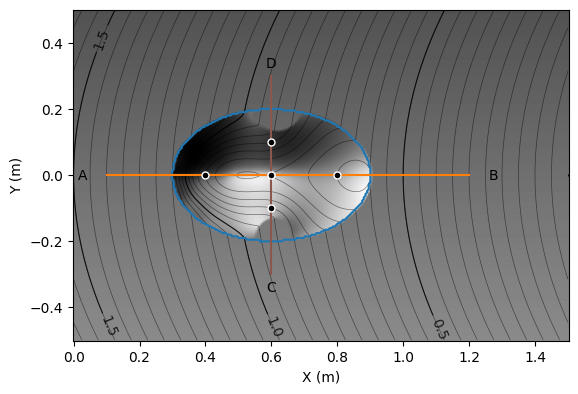

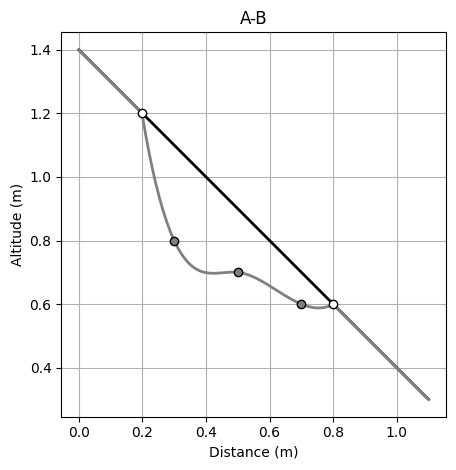

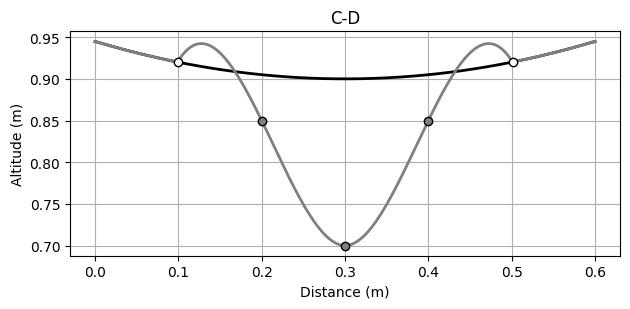

In [11]:
new_dem.surf_max = zold
new_dem.update_interpolation()
new_dem.plot()
new_dem["A-B"].plot()
new_dem["C-D"].plot()